Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

Load Dataset

In [2]:
train=pd.read_csv('Doctor Fees-Train.csv')
test=pd.read_csv('Doctor Fees-Test.csv')

In [3]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


Shape of test dataset

In [5]:
test.shape

(1987, 6)

In [6]:
test['Fees']=np.nan

In [7]:
train=pd.concat([train,test],axis=0)

In [8]:
#shape of both test and train dataset
train.shape

(7948, 7)

In [9]:
#Extract experience numbers from data
train['experience']=train.Experience.str.extract('(\d+)')

In [10]:
train.Place.value_counts()

Andheri West, Mumbai        97
HSR Layout, Bangalore       97
Dwarka, Delhi               93
Banjara Hills, Hyderabad    85
Mulund West, Mumbai         81
                            ..
Yakutpura, Hyderabad         1
Cheranalloor, Ernakulam      1
Raj Nagar - 2, Delhi         1
Neeti Bagh, Delhi            1
SV Road, Mumbai              1
Name: Place, Length: 948, dtype: int64

In [11]:
#Extracting Place from data
train['place']=train.Place.str.extract(',\s([a-zA-Z]*)$')

In [12]:
train.Rating.value_counts()

100%    907
98%     402
99%     327
97%     325
96%     285
95%     225
94%     166
93%     143
92%      95
90%      95
91%      86
88%      54
89%      53
85%      35
82%      32
83%      32
86%      27
80%      26
87%      25
84%      20
77%      17
67%      17
71%      16
81%      15
79%      15
76%      13
73%      13
60%      11
75%       8
70%       8
78%       7
74%       7
69%       6
55%       5
56%       5
68%       5
64%       4
72%       3
57%       3
63%       2
62%       2
65%       2
53%       2
33%       2
47%       1
48%       1
45%       1
7%        1
52%       1
36%       1
40%       1
58%       1
Name: Rating, dtype: int64

In [13]:
#Extracting rating from data
train['rating']=train.Rating.str.extract('(\d+)')

In [14]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience,place,rating
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,24,Ernakulam,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,12,Bangalore,98
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,9,Bangalore,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,12,Bangalore,NaN
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,20,Chennai,100


In [15]:
x=np.where(train.Qualification.str.contains('(MBBS|BDS|MD|MS|LCEH|DDVL|BAMS|BSAM|BHMS|DHMS|DNB|Get inspired)')==False)

In [16]:
for i in x:
    print(train.iloc[i,:].Qualification)

104     PhD - Orthodontics & Dentofacial Orthopaedics,...
224                                                  GCEH
753                                   39 years experience
829     Diplomate of National Board Exam, Diploma in O...
1030                 Diploma in Otorhinolaryngology (DLO)
1064              GCEH, Certificate in Child Health (CCH)
1265                               Diploma in Dermatology
1297                                              G.A.M.S
2005                                              G.A.M.S
2035    Fellowship in Oral implantlogy, Certified Adva...
2975                                           M.D. (E.H)
4503                                                  DDV
4757    Diploma in Otorhinolaryngology (DLO), Diploma ...
5182                                              G.A.M.S
443                                FRCS - General Surgery
471                                            FWFO, FPFA
1139                               Diploma in Dermatology
1159          

In [17]:
#Making extra columns for each qualification

train['MBBS']=train.Qualification.str.extract('(MBBS)')
train['BDS']=train.Qualification.str.extract('(BDS)')
train['MD']=train.Qualification.str.extract('(MD)')
train['MS']=train.Qualification.str.extract('(MS)')
train['LCEH']=train.Qualification.str.extract('(LCEH)')
train['DDVL']=train.Qualification.str.extract('(DDVL)')
train['BAMS']=train.Qualification.str.extract('(BAMS)')
train['BSAM']=train.Qualification.str.extract('(BSAM)')
train['BHMS']=train.Qualification.str.extract('(BHMS)')
train['DHMS']=train.Qualification.str.extract('(DHMS)')
train['DNB']=train.Qualification.str.extract('(DNB)')
train['Get']=train.Qualification.str.extract('(Get inspired)')

In [18]:
#Columns name
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees', 'experience', 'place', 'rating', 'MBBS',
       'BDS', 'MD', 'MS', 'LCEH', 'DDVL', 'BAMS', 'BSAM', 'BHMS', 'DHMS',
       'DNB', 'Get'],
      dtype='object')

In [19]:
train.iloc[:,10:22]=train.iloc[:,10:22].fillna(0)

In [20]:
train.iloc[:,10:22]=train.iloc[:,10:22].replace({'MBBS':1,
       'BDS':1,'MD':1,'MS':1,'LCEH':1,'DDVL':1,'BAMS':1,'BSAM':1,'BHMS':1,'DHMS':1,
       'DNB':1,'Get':1})

In [21]:
attributes = ['Profile', 'Fees' , 'experience','place','rating','MBBS','BDS','MD','MS','LCEH','DDVL',
              'BAMS','BSAM','BHMS','DHMS','DNB','Get']

In [22]:
train=train[attributes]

In [24]:
#Info about train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Profile     7948 non-null   object 
 1   Fees        5961 non-null   float64
 2   experience  7948 non-null   object 
 3   place       7916 non-null   object 
 4   rating      3556 non-null   object 
 5   MBBS        7948 non-null   int64  
 6   BDS         7948 non-null   int64  
 7   MD          7948 non-null   int64  
 8   MS          7948 non-null   int64  
 9   LCEH        7948 non-null   int64  
 10  DDVL        7948 non-null   int64  
 11  BAMS        7948 non-null   int64  
 12  BSAM        7948 non-null   int64  
 13  BHMS        7948 non-null   int64  
 14  DHMS        7948 non-null   int64  
 15  DNB         7948 non-null   int64  
 16  Get         7948 non-null   object 
dtypes: float64(1), int64(11), object(5)
memory usage: 1.1+ MB


# EDA

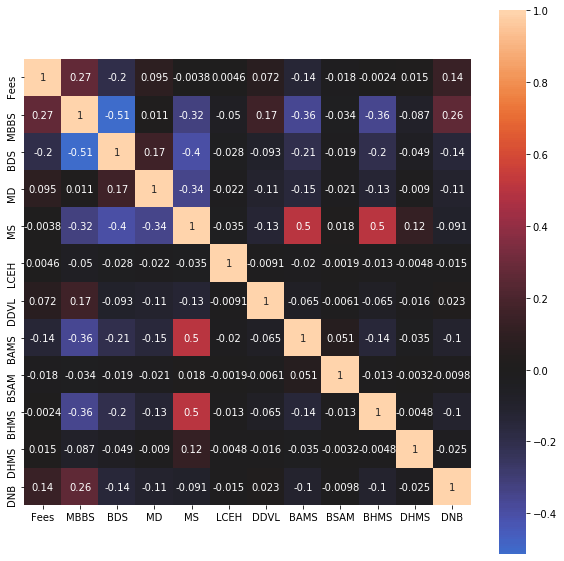

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True,square=True,center=0)
plt.show()

In [26]:
train.experience=train.experience.astype('int64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CBAD3A2048>]],
      dtype=object)

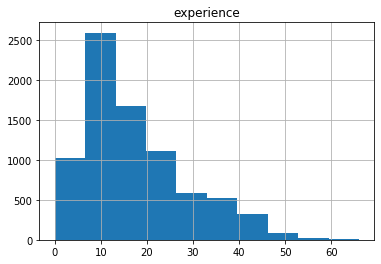

In [27]:
train.hist('experience')

In [28]:
train.head()

,Profile,Fees,experience,place,rating,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,24,Ernakulam,100,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,12,Bangalore,98,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,9,Bangalore,NaN,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,12,Bangalore,NaN,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,20,Chennai,100,0,0,0,1,0,0,1,0,0,0,0,0


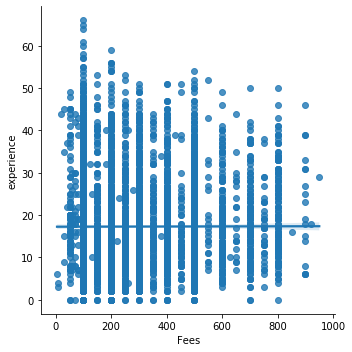

In [29]:
sns.lmplot('Fees', 'experience', data = train)

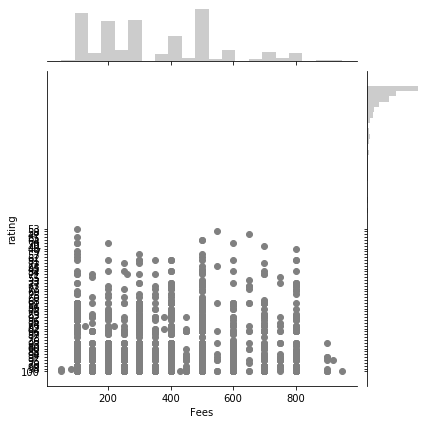

In [30]:
sns.jointplot(x='Fees',y='rating',data=train, color='grey')

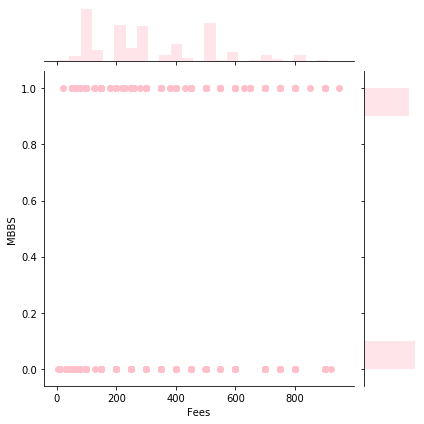

In [31]:
sns.jointplot(x='Fees',y='MBBS',data=train, color='pink')

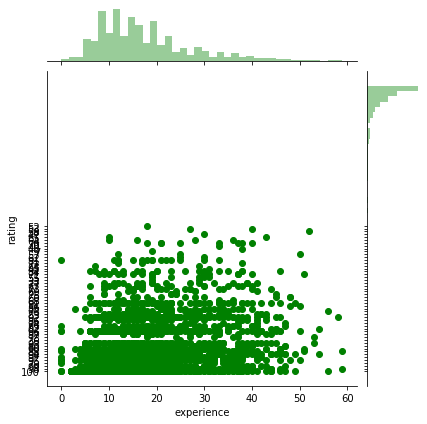

In [32]:
sns.jointplot(x='experience',y='rating',data=train, color='green')

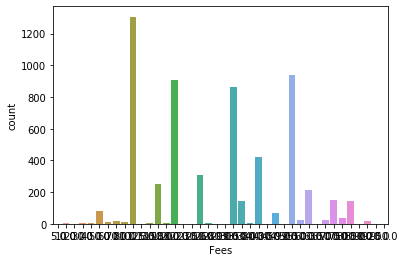

In [33]:
sns.countplot(x='Fees',data=train)

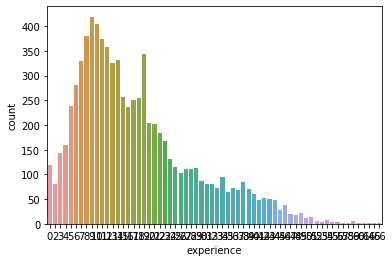

In [34]:
sns.countplot(x='experience',data=train)

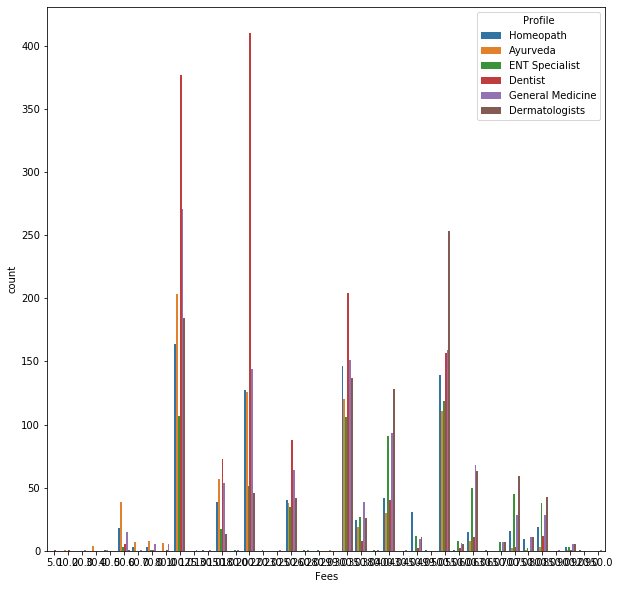

In [35]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='Fees',hue='Profile',data=train)

In [36]:
y=train.groupby('experience')['Fees'].mean()
y

experience
0     197.931034
2     240.579710
3     257.747748
4     273.643478
5     292.553191
         ...    
60    100.000000
61    100.000000
64    100.000000
65    100.000000
66    100.000000
Name: Fees, Length: 64, dtype: float64

In [37]:
a=[1,2,3,4,5,6,7,8]
train['experience']=pd.cut(train.experience,bins=[0,3,8,14,26,36,45,50,66],labels=a,right=False)

In [38]:
#checking missing values
train.isnull().sum()

Profile          0
Fees          1987
experience       1
place           32
rating        4392
MBBS             0
BDS              0
MD               0
MS               0
LCEH             0
DDVL             0
BAMS             0
BSAM             0
BHMS             0
DHMS             0
DNB              0
Get              0
dtype: int64

In [39]:
#removing columns having large amount of null values
del train['rating']

In [40]:
train[train.experience.isnull()==True]

,Profile,Fees,experience,place,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
372,ENT Specialist,100.0,NaN,Chennai,1,0,0,0,0,0,0,0,0,0,0,0


In [41]:
train.experience=train.experience.fillna(8)

In [42]:
train.place=train.place.fillna('no_city')

In [43]:
test=train.iloc[5962:,:]

In [44]:
train=train.iloc[:5961,:]

In [45]:
train=pd.get_dummies(train)

In [46]:
train_label=train.Fees
del train['Fees']

In [47]:
test=pd.get_dummies(test)

In [48]:
del test['Fees']

In [49]:
train['Fees']=train_label
train.head()

,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,...,place_Coimbatore,place_Delhi,place_Ernakulam,place_Hyderabad,place_Mumbai,place_Thiruvananthapuram,place_no_city,Get_0,Get_Get inspired,Fees
0,0,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,100.0
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,350.0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,300.0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,250.0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,250.0


In [50]:
df=train
df_label=df['Fees']
train , val = train_test_split(train,test_size=0.20,random_state=42)

In [51]:
train_label=train.Fees
val_label=val.Fees
del train['Fees']
del val['Fees']

In [52]:
del df['Fees']

In [53]:
def rmsle(predict,real):
    x=np.sqrt(np.mean(np.power((np.log10(real+1)-np.log10(predict+1)),2)))
    return(x,np.std(x))

In [54]:
#cross vald function
def func(estimator,data,label,folds):
    score=cross_val_score(estimator,train,train_label,cv=folds, scoring='neg_mean_squared_error')
    rmse=np.sqrt(-score)
    return(rmse)

Linear regression

In [55]:
lr=LinearRegression()

score_lr=func(lr,df,df_label,10)

score_lr.mean()

175.6761347451663

In [56]:
lr.fit(df,df_label)
total=lr.predict(val)

rmsle_lr,std_lr=rmsle(total,val_label)
rmsle_lr,std_lr


(0.2667468646674417, 0.0)

Decision Tree Regression

In [57]:
dtr=DecisionTreeRegressor()

score_dtr=func(dtr,df,df_label,10)

score_dtr.mean()

187.6966396548156

In [58]:
dtr.fit(train,train_label)
score=dtr.predict(val)
rmsle_dtr,std_dtr=rmsle(score,val_label)
rmsle_dtr,std_dtr

(0.28196099806049585, 0.0)

SVM

In [59]:
svm=SVR(kernel='rbf',gamma=0.05,C=70)

score_svm=func(svm,df,df_label,10)

score_svm.mean()

177.03933636950597

In [60]:
svm.fit(train,train_label)
score=svm.predict(val)
rmsle_svm,std_svm=rmsle(score,val_label)
rmsle_svm,std_svm

(0.2597882112780436, 0.0)

KNeighbours Regression

In [61]:
knn=KNeighborsRegressor(40,algorithm='auto')
score=func(knn,train,train_label,10)
score_knn=score.mean()

score_knn

176.81335043311492

In [62]:
knn.fit(train,train_label)
score=knn.predict(val)
rmsle_knn,std_knn=rmsle(score,val_label)
rmsle_knn,std_knn

(0.27191621821686224, 0.0)

RandomForest Regression

In [63]:
rf=RandomForestRegressor(random_state=17)
score=func(rf,df,df_label,10)
score_rf=score.mean()
score_rf

181.57168398082896

In [64]:
rf.fit(train,train_label)
score=rf.predict(val)
rmsle_rf,std_rf=rmsle(score,val_label)
rmsle_rf,std_rf

(0.27390138466040886, 0.0)

In [65]:
table=pd.DataFrame([rmsle_lr,rmsle_dtr,rmsle_svm,rmsle_rf,rmsle_knn],
            index=['LinearReg','Tree','SVM','Random','knn'])

In [66]:
table.sort_values(by=0)

,0
SVM,0.259788
LinearReg,0.266747
knn,0.271916
Random,0.273901
Tree,0.281961


In [67]:
imp=pd.DataFrame(rf.feature_importances_ ,index=train.columns)

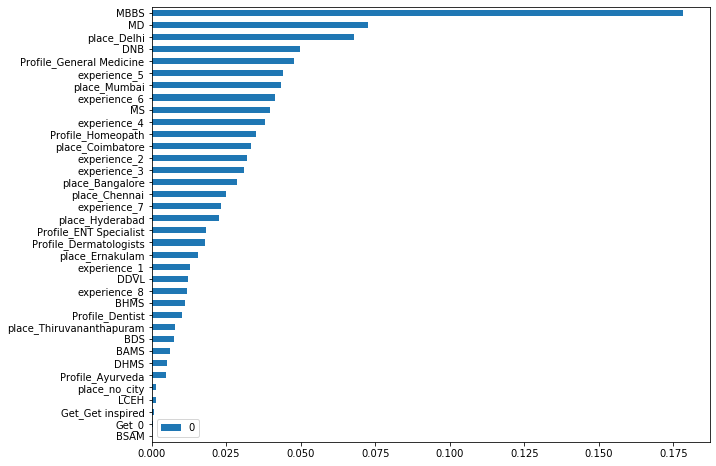

In [68]:
imp.sort_values(by=0).plot.barh(figsize=(10,8))

In [69]:
train.shape , test.shape , val.shape

((4768, 36), (1986, 36), (1193, 36))

In [70]:
from sklearn.externals import joblib
joblib.dump(rf,'Doctor Fees-Train.csv.obj')

['Doctor Fees-Train.csv.obj']